In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Memilih hanya 100.000 Baris Data

In [ ]:
import pandas as pd

# # Ambil 100_000 baris terakhir dari data
# chunksize = 100_000
# chunks = []

# # Baca file secara bertahap, simpan hanya chunk terakhir
# for chunk in pd.read_csv("ID_DIB_2023.CSV", chunksize=chunksize):
#     chunks.append(chunk)
#     if len(chunks) > 2:
#         chunks.pop(0)

# df_last = pd.concat(chunks, ignore_index=True).tail(100_000)

# df_last.to_csv("ID_DIB_2023_last100k.csv", index=False)
# print("Sukses: 100.000 baris terakhir disimpan ke ID_DIB_2023_last100k.csv")


# Load Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset PMD/ID_DIB_2023_last100k.csv')
data

,persistent_id,tender_id,tender_title,tender_proceduretype,tender_nationalproceduretype,tender_isawarded,tender_supplytype,tender_biddeadline,tender_isjointprocurement,tender_lotscount,...,corr_singleb,corr_proc,submission_period,corr_subm,corr_nocft,decision_period,corr_decp,corr_tax_haven,corr_buyer_concentration,cri
0,ID_ca78567cbcb5f1f7113d71d51b35c2b17eb6aefb686...,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,Tender - Pascakualifikasi Satu File - Harga Te...,NaN,WORKS,2021-06-29,NaN,1,...,0.0,0.0,6.0,1.0,NaN,15.0,0.0,NaN,0.006925,0.201385
1,ID_ca78567cbcb5f1f7113d71d51b35c2b17eb6aefb686...,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,Tender - Pascakualifikasi Satu File - Harga Te...,NaN,WORKS,2021-06-29,NaN,1,...,0.0,0.0,6.0,1.0,NaN,15.0,0.0,NaN,0.006420,0.201284
2,ID_ca78567cbcb5f1f7113d71d51b35c2b17eb6aefb686...,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,Tender - Pascakualifikasi Satu File - Harga Te...,NaN,WORKS,2021-06-29,NaN,1,...,0.0,0.0,6.0,1.0,NaN,15.0,0.0,NaN,0.007262,0.201452
3,ID_ca78567cbcb5f1f7113d71d51b35c2b17eb6aefb686...,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,Tender - Pascakualifikasi Satu File - Harga Te...,NaN,WORKS,2021-06-29,NaN,1,...,0.0,0.0,6.0,1.0,NaN,15.0,0.0,NaN,0.007608,0.201522
4,ID_ca78567cbcb5f1f7113d71d51b35c2b17eb6aefb686...,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,Tender - Pascakualifikasi Satu File - Harga Te...,NaN,WORKS,2021-06-29,NaN,1,...,0.0,0.0,6.0,1.0,NaN,15.0,0.0,NaN,0.007022,0.201404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,ID_fffc292dd6809583ecaf1ce7cf1268aeb08550a4abb...,483ec7f4-7e94-42d7-be3b-a6efae245905,Belanj Modal Bangunan Pengambilan Air Bersih/A...,OPEN,Tender - Pascakualifikasi Satu File - Harga Te...,NaN,WORKS,2021-08-20,NaN,1,...,0.0,0.0,7.0,0.5,NaN,4.0,1.0,NaN,0.156619,0.331324
99996,ID_fffcfec857242406352cbf7babc363c28917c5e024e...,999e2c46-17fc-4048-8503-68c4a5fc2fad,Survey Geofisik dan Geoteknik Spesifikasi: Spe...,OPEN,Seleksi - Prakualifikasi Dua File - Kualitas d...,NaN,NaN,2021-08-12,NaN,1,...,0.0,0.0,27.0,0.0,NaN,8.0,0.5,NaN,NaN,0.125000
99997,ID_fffde8d72e015c9344e9a7796dc8ef4f912d735df79...,e7016254-058a-45ef-bc89-b721085529af,Jasa Kebersihan April sampai dengan Desember T...,OPEN,Tender - Pascakualifikasi Satu File - Harga Te...,NaN,SERVICES,2021-04-09,NaN,1,...,0.0,0.0,8.0,0.5,NaN,7.0,0.5,NaN,NaN,0.250000
99998,ID_fffea1c838256520f9cab52aee1425e50ca15b0b599...,80eca440-9615-40df-99bc-4a24ddf60aa0,Revitalisasi SD Negeri Sidomulyo Kecamatan Pur...,OPEN,Tender - Pascakualifikasi Satu File - Harga Te...,NaN,WORKS,2021-06-29,NaN,1,...,0.0,0.0,12.0,0.0,NaN,7.0,0.5,NaN,0.005100,0.101020


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 126 entries, persistent_id to cri
dtypes: bool(7), float64(86), int64(3), object(30)
memory usage: 91.5+ MB


# Penanganan Missing Value

In [ ]:
data.isnull().sum()

,0
persistent_id,0
tender_id,0
tender_title,0
tender_proceduretype,4291
tender_nationalproceduretype,0
...,...
decision_period,355
corr_decp,0
corr_tax_haven,100000
corr_buyer_concentration,10509


In [ ]:
missing_values = (data.isnull().mean() * 100).sort_values(ascending=False)
print(missing_values)

tender_isawarded               100.0
tender_isjointprocurement      100.0
tender_isframeworkagreement    100.0
tender_isdps                   100.0
lot_estimatedprice             100.0
                               ...  
filter_year                      0.0
filter_cancelled                 0.0
filter_bidder                    0.0
corr_decp                        0.0
cri                              0.0
Length: 126, dtype: float64


In [ ]:
missing_values[missing_values > 50]

,0
tender_isawarded,100.000
tender_isjointprocurement,100.000
tender_isframeworkagreement,100.000
tender_isdps,100.000
lot_estimatedprice,100.000
...,...
tender_personalrequirements_length,100.000
corr_tax_haven,100.000
corr_nocft,100.000
lot_description_length,100.000


In [ ]:
kolom_drop = missing_values[missing_values > 50].index.tolist()
data_drop = data.drop(columns=kolom_drop)

In [ ]:
kolom_drop

['tender_isawarded',
 'tender_isjointprocurement',
 'tender_isframeworkagreement',
 'tender_isdps',
 'lot_estimatedprice',
 'lot_title',
 'tender_finalprice',
 'cancellation_reason',
 'tender_cancellationdate',
 'tender_awardcriteria_count',
 'tender_selectionmethod',
 'tender_iseufunded',
 'tender_maincpv',
 'tender_cpvs',
 'lot_row_nr',
 'tender_corrections_count',
 'buyer_nuts_3',
 'buyer_nuts_2',
 'buyer_buyertype',
 'buyer_city_e',
 'buyer_postcode',
 'buyer_postcode_e',
 'buyer_nuts',
 'buyer_city',
 'buyer_mainactivities',
 'buyer_id',
 'lot_updateddurationdays',
 'lot_smebidscount',
 'lot_electronicbidscount',
 'lot_validbidscount',
 'buyer_url',
 'buyer_email',
 'buyer_phone',
 'buyer_contactName',
 'buyer_nuts_1',
 'buyer_nuts_0',
 'buyer_street',
 'buyer_type',
 'buyer_extra_source_id',
 'buyer_sourceid_type',
 'buyer_country_e',
 'buyer_nuts_e_clean',
 'tender_economicrequirements_length',
 'bid_subcontractedproportion',
 'bid_isconsortium',
 'tender_addressofimplementation

In [ ]:
jumlah_missing_values = data_drop.isnull().sum().sort_values(ascending=False)
jumlah_missing_values

,0
bid_price,41881
bid_priceUsd,41881
tender_supplytype,12742
corr_buyer_concentration,10509
bidder_city,8362
bidder_street,8336
bidder_sourceid_type,4784
bidder_id,4784
bidder_extra_source_id,4784
bid_iswinning,4746


# Menghapus Kolom yang Tidak Perlu

In [ ]:
data_drop = data_drop.drop(["bid_priceUsd", "bidder_street", "bidder_city"], axis=1)

In [ ]:
data_drop["has_bid_price"] = data_drop["bid_price"].notnull().astype(int)
data_drop["bid_price"] = data_drop["bid_price"].fillna(0)
data_drop["corr_buyer_concentration"] = data_drop["corr_buyer_concentration"].fillna(0)

In [ ]:
for dtype in data_drop.dtypes.unique():
    print(f"\n===== Tipe Data: {dtype} =====")
    display(data_drop.select_dtypes(include=[dtype]).info())


===== Tipe Data: object =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   persistent_id                                100000 non-null  object
 1   tender_id                                    100000 non-null  object
 2   tender_title                                 100000 non-null  object
 3   tender_proceduretype                         95709 non-null   object
 4   tender_nationalproceduretype                 100000 non-null  object
 5   tender_supplytype                            87258 non-null   object
 6   tender_biddeadline                           100000 non-null  object
 7   tender_contractsignaturedate                 99963 non-null   object
 8   tender_awarddecisiondate                     99658 non-null   object
 9   lot_status                              

None


===== Tipe Data: int64 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   tender_lotscount          100000 non-null  int64
 1   tender_recordedbidscount  100000 non-null  int64
 2   lot_bidscount             100000 non-null  int64
 3   has_bid_price             100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


None


===== Tipe Data: float64 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   tender_estimatedprice     99980 non-null   float64
 1   bid_price                 100000 non-null  float64
 2   tender_year               100000 non-null  float64
 3   tender_digiwhist_price    99980 non-null   float64
 4   tender_estimatedpriceUsd  99980 non-null   float64
 5   corr_singleb              99866 non-null   float64
 6   corr_proc                 95709 non-null   float64
 7   submission_period         99998 non-null   float64
 8   corr_subm                 99998 non-null   float64
 9   decision_period           99645 non-null   float64
 10  corr_decp                 100000 non-null  float64
 11  corr_buyer_concentration  100000 non-null  float64
 12  cri                       100000 non-null  float64
dtypes: float64(13

None


===== Tipe Data: bool =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   filter_buyer       100000 non-null  bool 
 1   filter_bidder      100000 non-null  bool 
 2   filter_cancelled   100000 non-null  bool 
 3   filter_opentender  100000 non-null  bool 
 4   filter_year        100000 non-null  bool 
 5   filter_losingbids  100000 non-null  bool 
 6   filter_ok          100000 non-null  bool 
dtypes: bool(7)
memory usage: 683.7 KB


None

In [ ]:
kolom_tdk_relevan = [
    "persistent_id", "tender_nationalproceduretype","tender_biddeadline", "buyer_email", "buyer_phone",
    "buyer_street", "buyer_url", "bidder_email", "bidder_phone","bidder_street", "bidder_url", "bidder_contactName",
    "bidder_extra_source_id", "bidder_sourceid_type", "notice_url", "tender_publications_lastcontractawardurl", "tender_publications_firstcallfortenderdate","tender_publications_firstdcontractawarddate", "currency", "tender_estimatedpriceUsd",
    "tender_cpvs", "tender_maincpv", "bidder_city", "buyer_contactName", "buyer_masterid", "bidder_masterid"
]

data_filter = data_drop.drop(columns=[col for col in kolom_tdk_relevan if col in data_drop.columns])

# Melakukan Imputasi

In [ ]:
from sklearn.impute import SimpleImputer

# Imputasi numerik (median)
num_cols = data_filter.select_dtypes(include=["float64", "int64"]).columns
imputer = SimpleImputer(strategy='median')
data_filter[num_cols] = imputer.fit_transform(data_filter[num_cols])

# Imputasi kategorikal (UNKNOWN)
cat_cols = data_filter.select_dtypes(include=["object"]).columns
data_filter[cat_cols] = data_filter[cat_cols].fillna("UNKNOWN")

# Menghapus Data Duplikat

In [ ]:
duplicates = data_filter[data_filter.duplicated(subset=["bidder_name", "buyer_name", "tender_id", "bid_price", "cri"], keep=False)]

print(f"Jumlah baris duplikat: {len(duplicates)}")
duplicates

Jumlah baris duplikat: 104


,tender_id,tender_title,tender_proceduretype,tender_supplytype,tender_lotscount,tender_recordedbidscount,tender_contractsignaturedate,tender_awarddecisiondate,tender_estimatedprice,bid_price,...,filter_ok,corr_singleb,corr_proc,submission_period,corr_subm,decision_period,corr_decp,corr_buyer_concentration,cri,has_bid_price
485,1e66ffd5-78a2-4fbd-a9e0-a304a766a2b0,Penguatan Database dan Survei Kondisi Jalan da...,OPEN,SERVICES,1.0,17.0,2021-08-20,2021-08-13,4.499550e+08,0.000000e+00,...,False,0.0,0.0,25.0,0.0,18.0,0.0,0.000000,0.000000,0.0
497,1e66ffd5-78a2-4fbd-a9e0-a304a766a2b0,Penguatan Database dan Survei Kondisi Jalan da...,OPEN,SERVICES,1.0,17.0,2021-08-20,2021-08-13,4.499550e+08,0.000000e+00,...,False,0.0,0.0,25.0,0.0,18.0,0.0,0.000000,0.000000,0.0
2057,2b85e34d-6161-4297-bc0e-08446336eef1,Rehab Ruang Kelas SMPN 1 Siak Kecil,OPEN,WORKS,1.0,8.0,2021-07-19,2021-07-09,5.775740e+08,4.928888e+08,...,False,0.0,0.0,7.0,0.5,11.0,0.0,0.005857,0.101171,1.0
2058,2b85e34d-6161-4297-bc0e-08446336eef1,Rehab Ruang Kelas SMPN 1 Siak Kecil,OPEN,WORKS,1.0,8.0,2021-07-19,2021-07-09,5.775740e+08,4.928888e+08,...,False,0.0,0.0,7.0,0.5,11.0,0.0,0.005857,0.101171,1.0
3547,0a3eeb3a-0942-4600-94d3-793971ef981f,Perbaikan Sistem Penyediaan Air Minum (SPAM) D...,OPEN,WORKS,1.0,17.0,2021-07-15,2021-07-01,4.186600e+08,3.118741e+08,...,False,0.0,0.0,11.0,0.5,17.0,0.0,0.015193,0.103039,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97286,60166d54-41a5-43bb-8030-69e32e69a8ba,Peningkatan Jalan Kalicilik - Tanjungharjo,OPEN,WORKS,1.0,9.0,2021-05-24,2021-04-12,1.500000e+10,1.440819e+10,...,False,0.0,0.0,17.0,0.0,28.0,0.0,0.009951,0.001990,1.0
98681,e1391da5-348b-43d5-a8a0-e57a4adbd6e5,Pengawasan Supervisi Kegiatan RR Rekonstruksi ...,OPEN,SERVICES,1.0,17.0,2021-02-24,2021-02-11,1.719850e+08,0.000000e+00,...,False,0.0,0.0,42.0,0.0,8.0,0.5,0.000000,0.100000,0.0
98683,e1391da5-348b-43d5-a8a0-e57a4adbd6e5,Pengawasan Supervisi Kegiatan RR Rekonstruksi ...,OPEN,SERVICES,1.0,17.0,2021-02-24,2021-02-11,1.719850e+08,0.000000e+00,...,False,0.0,0.0,42.0,0.0,8.0,0.5,0.000000,0.100000,0.0
99186,b68f8f07-af8e-4281-9c1c-cc5614bab5e8,Penyusunan Materi Teknis RTR KSN Kawasan Keraj...,OPEN,SERVICES,1.0,67.0,2021-04-21,2021-04-08,1.406933e+09,0.000000e+00,...,False,0.0,0.0,59.0,0.0,3.0,1.0,0.000000,0.200000,0.0


In [ ]:
# Ubah semua kolom bertipe bool menjadi integer 0/1
bool_cols = data_filter.select_dtypes(include='bool').columns
data_filter[bool_cols] = data_filter[bool_cols].astype(int)

In [ ]:
data_bersih = data_filter.drop_duplicates(subset=["bidder_name", "buyer_name", "tender_id", "bid_price", "cri"], keep='first')

In [ ]:
data_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99948 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tender_id                     99948 non-null  object 
 1   tender_title                  99948 non-null  object 
 2   tender_proceduretype          99948 non-null  object 
 3   tender_supplytype             99948 non-null  object 
 4   tender_lotscount              99948 non-null  float64
 5   tender_recordedbidscount      99948 non-null  float64
 6   tender_contractsignaturedate  99948 non-null  object 
 7   tender_awarddecisiondate      99948 non-null  object 
 8   tender_estimatedprice         99948 non-null  float64
 9   bid_price                     99948 non-null  float64
 10  lot_status                    99948 non-null  object 
 11  lot_bidscount                 99948 non-null  float64
 12  buyer_name                    99948 non-null  object 
 13  buyer_

# Melakukan Rename pada semua kolom untuk mempermudah

In [ ]:
rename_dict = {
    "tender_id": "id_tender",
    "tender_title": "judul_tender",
    "tender_proceduretype": "jenis_prosedur",
    "tender_supplytype": "jenis_pengadaan",
    "tender_lotscount": "jumlah_lot",
    "tender_recordedbidscount": "jumlah_penawaran_terekam",
    "tender_contractsignaturedate": "tanggal_kontrak",
    "tender_awarddecisiondate": "tanggal_keputusan_pemenang",
    "tender_estimatedprice": "harga_estimasi",
    "bid_price": "harga_penawaran",
    "lot_status": "status_lot",
    "lot_bidscount": "jumlah_penawar",
    "buyer_name": "nama_instansi",
    "buyer_country": "negara_instansi",
    "bidder_id": "id_penyedia",
    "bidder_name": "nama_penyedia",
    "bidder_type": "tipe_penyedia",
    "bid_iswinning": "penyedia_menang",
    "source": "sumber_data",
    "tender_year": "tahun_tender",
    "tender_digiwhist_price": "harga_digiwhist",
    "lot_id": "id_lot",
    "bid_id": "id_penawaran",
    "filter_buyer": "filter_instansi_valid",
    "filter_bidder": "filter_penyedia_valid",
    "filter_cancelled": "filter_dibatalkan",
    "filter_opentender": "filter_terbuka",
    "filter_year": "filter_tahun_valid",
    "filter_losingbids": "filter_penawar_kalah",
    "filter_ok": "data_valid",
    "corr_singleb": "indikator_penawar_tunggal",
    "corr_proc": "indikator_prosedur_berisiko",
    "submission_period": "durasi_penawaran",
    "corr_subm": "indikator_submisi_berisiko",
    "decision_period": "durasi_keputusan",
    "corr_decp": "indikator_keputusan_berisiko",
    "corr_buyer_concentration": "konsentrasi_instansi",
    "cri": "skor_risiko_korupsi",
    "has_bid_price": "ada_harga_penawaran"
}

data_bersih = data_bersih.rename(columns=rename_dict)


In [ ]:
data_bersih

,id_tender,judul_tender,jenis_prosedur,jenis_pengadaan,jumlah_lot,jumlah_penawaran_terekam,tanggal_kontrak,tanggal_keputusan_pemenang,harga_estimasi,harga_penawaran,...,data_valid,indikator_penawar_tunggal,indikator_prosedur_berisiko,durasi_penawaran,indikator_submisi_berisiko,durasi_keputusan,indikator_keputusan_berisiko,konsentrasi_instansi,skor_risiko_korupsi,ada_harga_penawaran
0,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,447099201.0,...,0,0.0,0.0,6.0,1.0,15.0,0.0,0.006925,0.201385,1.0
1,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,414476414.0,...,0,0.0,0.0,6.0,1.0,15.0,0.0,0.006420,0.201284,1.0
2,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,468840095.0,...,0,0.0,0.0,6.0,1.0,15.0,0.0,0.007262,0.201452,1.0
3,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,491176585.0,...,0,0.0,0.0,6.0,1.0,15.0,0.0,0.007608,0.201522,1.0
4,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,453392800.0,...,0,0.0,0.0,6.0,1.0,15.0,0.0,0.007022,0.201404,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,483ec7f4-7e94-42d7-be3b-a6efae245905,Belanj Modal Bangunan Pengambilan Air Bersih/A...,OPEN,WORKS,1.0,2.0,2021-08-30,2021-08-24,4.880000e+08,483657498.0,...,0,0.0,0.0,7.0,0.5,4.0,1.0,0.156619,0.331324,1.0
99996,999e2c46-17fc-4048-8503-68c4a5fc2fad,Survey Geofisik dan Geoteknik Spesifikasi: Spe...,OPEN,UNKNOWN,1.0,0.0,2021-09-02,2021-08-20,8.599953e+09,0.0,...,0,0.0,0.0,27.0,0.0,8.0,0.5,0.000000,0.125000,0.0
99997,e7016254-058a-45ef-bc89-b721085529af,Jasa Kebersihan April sampai dengan Desember T...,OPEN,SERVICES,1.0,0.0,2021-04-30,2021-04-16,3.357096e+09,0.0,...,0,0.0,0.0,8.0,0.5,7.0,0.5,0.000000,0.250000,0.0
99998,80eca440-9615-40df-99bc-4a24ddf60aa0,Revitalisasi SD Negeri Sidomulyo Kecamatan Pur...,OPEN,WORKS,1.0,1.0,2021-07-20,2021-07-06,2.815196e+08,278788000.0,...,1,0.0,0.0,12.0,0.0,7.0,0.5,0.005100,0.101020,1.0


In [ ]:
data_bersih.duplicated().sum()

np.int64(0)

# Membuat Label berdasarkan nilai CRI

In [ ]:
if 'skor_risiko_korupsi' not in data_bersih.columns:
    raise ValueError("Kolom 'cri' tidak ditemukan di dataset.")

# Buat kolom target: 1 jika cri >= 0.3, else 0
data_bersih['label'] = (data_bersih['skor_risiko_korupsi'] >= 0.3).astype(int)

# (Opsional) Drop kolom 'cri' kalau tidak mau dipakai lagi
# data_bersih = data_bersih.drop(columns=['cri'])

print(data_bersih[['skor_risiko_korupsi', 'label']].head())

   skor_risiko_korupsi  label
0             0.201385      0
1             0.201284      0
2             0.201452      0
3             0.201522      0
4             0.201404      0


# Menyimpan Data Bersih

In [ ]:
data_bersih.to_csv("data_bersih3.csv", index=False)
print("Sukses: data bersih disimpan ke data_bersih.csv")

Sukses: data bersih disimpan ke data_bersih.csv


# EDA

In [ ]:
data = pd.read_csv("data_bersih3.csv")
data

,id_tender,judul_tender,jenis_prosedur,jenis_pengadaan,jumlah_lot,jumlah_penawaran_terekam,tanggal_kontrak,tanggal_keputusan_pemenang,harga_estimasi,harga_penawaran,...,indikator_penawar_tunggal,indikator_prosedur_berisiko,durasi_penawaran,indikator_submisi_berisiko,durasi_keputusan,indikator_keputusan_berisiko,konsentrasi_instansi,skor_risiko_korupsi,ada_harga_penawaran,label
0,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,447099201.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.006925,0.201385,1.0,0
1,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,414476414.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.006420,0.201284,1.0,0
2,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,468840095.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.007262,0.201452,1.0,0
3,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,491176585.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.007608,0.201522,1.0,0
4,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,2021-08-04,2021-07-14,5.667410e+08,453392800.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.007022,0.201404,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99943,483ec7f4-7e94-42d7-be3b-a6efae245905,Belanj Modal Bangunan Pengambilan Air Bersih/A...,OPEN,WORKS,1.0,2.0,2021-08-30,2021-08-24,4.880000e+08,483657498.0,...,0.0,0.0,7.0,0.5,4.0,1.0,0.156619,0.331324,1.0,1
99944,999e2c46-17fc-4048-8503-68c4a5fc2fad,Survey Geofisik dan Geoteknik Spesifikasi: Spe...,OPEN,UNKNOWN,1.0,0.0,2021-09-02,2021-08-20,8.599953e+09,0.0,...,0.0,0.0,27.0,0.0,8.0,0.5,0.000000,0.125000,0.0,0
99945,e7016254-058a-45ef-bc89-b721085529af,Jasa Kebersihan April sampai dengan Desember T...,OPEN,SERVICES,1.0,0.0,2021-04-30,2021-04-16,3.357096e+09,0.0,...,0.0,0.0,8.0,0.5,7.0,0.5,0.000000,0.250000,0.0,0
99946,80eca440-9615-40df-99bc-4a24ddf60aa0,Revitalisasi SD Negeri Sidomulyo Kecamatan Pur...,OPEN,WORKS,1.0,1.0,2021-07-20,2021-07-06,2.815196e+08,278788000.0,...,0.0,0.0,12.0,0.0,7.0,0.5,0.005100,0.101020,1.0,0


In [ ]:
df = data.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99948 entries, 0 to 99947
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_tender                     99948 non-null  object 
 1   judul_tender                  99948 non-null  object 
 2   jenis_prosedur                99948 non-null  object 
 3   jenis_pengadaan               99948 non-null  object 
 4   jumlah_lot                    99948 non-null  float64
 5   jumlah_penawaran_terekam      99948 non-null  float64
 6   tanggal_kontrak               99948 non-null  object 
 7   tanggal_keputusan_pemenang    99948 non-null  object 
 8   harga_estimasi                99948 non-null  float64
 9   harga_penawaran               99948 non-null  float64
 10  status_lot                    99948 non-null  object 
 11  jumlah_penawar                99948 non-null  float64
 12  nama_instansi                 99948 non-null  object 
 13  n

In [ ]:
tanggal_cols = ['tanggal_kontrak', 'tanggal_keputusan_pemenang']

# Konversi kolom tanggal
for col in tanggal_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99948 entries, 0 to 99947
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_tender                     99948 non-null  object        
 1   judul_tender                  99948 non-null  object        
 2   jenis_prosedur                99948 non-null  object        
 3   jenis_pengadaan               99948 non-null  object        
 4   jumlah_lot                    99948 non-null  float64       
 5   jumlah_penawaran_terekam      99948 non-null  float64       
 6   tanggal_kontrak               99911 non-null  datetime64[ns]
 7   tanggal_keputusan_pemenang    99606 non-null  datetime64[ns]
 8   harga_estimasi                99948 non-null  float64       
 9   harga_penawaran               99948 non-null  float64       
 10  status_lot                    99948 non-null  object        
 11  jumlah_penawar              

In [ ]:
df.columns.unique()

Index(['id_tender', 'judul_tender', 'jenis_prosedur', 'jenis_pengadaan',
       'jumlah_lot', 'jumlah_penawaran_terekam', 'tanggal_kontrak',
       'tanggal_keputusan_pemenang', 'harga_estimasi', 'harga_penawaran',
       'status_lot', 'jumlah_penawar', 'nama_instansi', 'negara_instansi',
       'id_penyedia', 'nama_penyedia', 'tipe_penyedia', 'penyedia_menang',
       'sumber_data', 'tahun_tender', 'harga_digiwhist', 'id_lot',
       'id_penawaran', 'filter_instansi_valid', 'filter_penyedia_valid',
       'filter_dibatalkan', 'filter_terbuka', 'filter_tahun_valid',
       'filter_penawar_kalah', 'data_valid', 'indikator_penawar_tunggal',
       'indikator_prosedur_berisiko', 'durasi_penawaran',
       'indikator_submisi_berisiko', 'durasi_keputusan',
       'indikator_keputusan_berisiko', 'konsentrasi_instansi',
       'skor_risiko_korupsi', 'ada_harga_penawaran', 'label'],
      dtype='object')

In [ ]:
# Cek kolom yang punya 1 nilai unik
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"{col} hanya punya 1 nilai: {df[col].unique()[0]}")


jumlah_lot hanya punya 1 nilai: 1.0
status_lot hanya punya 1 nilai: AWARDED
negara_instansi hanya punya 1 nilai: ID
sumber_data hanya punya 1 nilai: http://inaproc.id/lpse/_tender
tahun_tender hanya punya 1 nilai: 2021.0
filter_instansi_valid hanya punya 1 nilai: 1
filter_dibatalkan hanya punya 1 nilai: 1
filter_terbuka hanya punya 1 nilai: 1
filter_tahun_valid hanya punya 1 nilai: 1


Visualisasi Distribusi

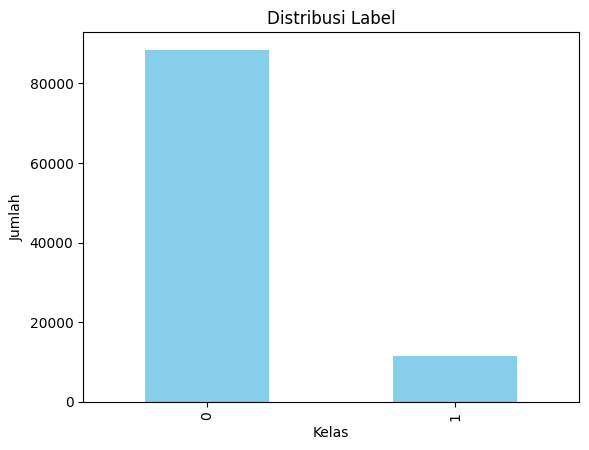

In [ ]:
import matplotlib.pyplot as plt

value_counts = df['label'].value_counts()

value_counts.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
plt.title('Distribusi Label')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

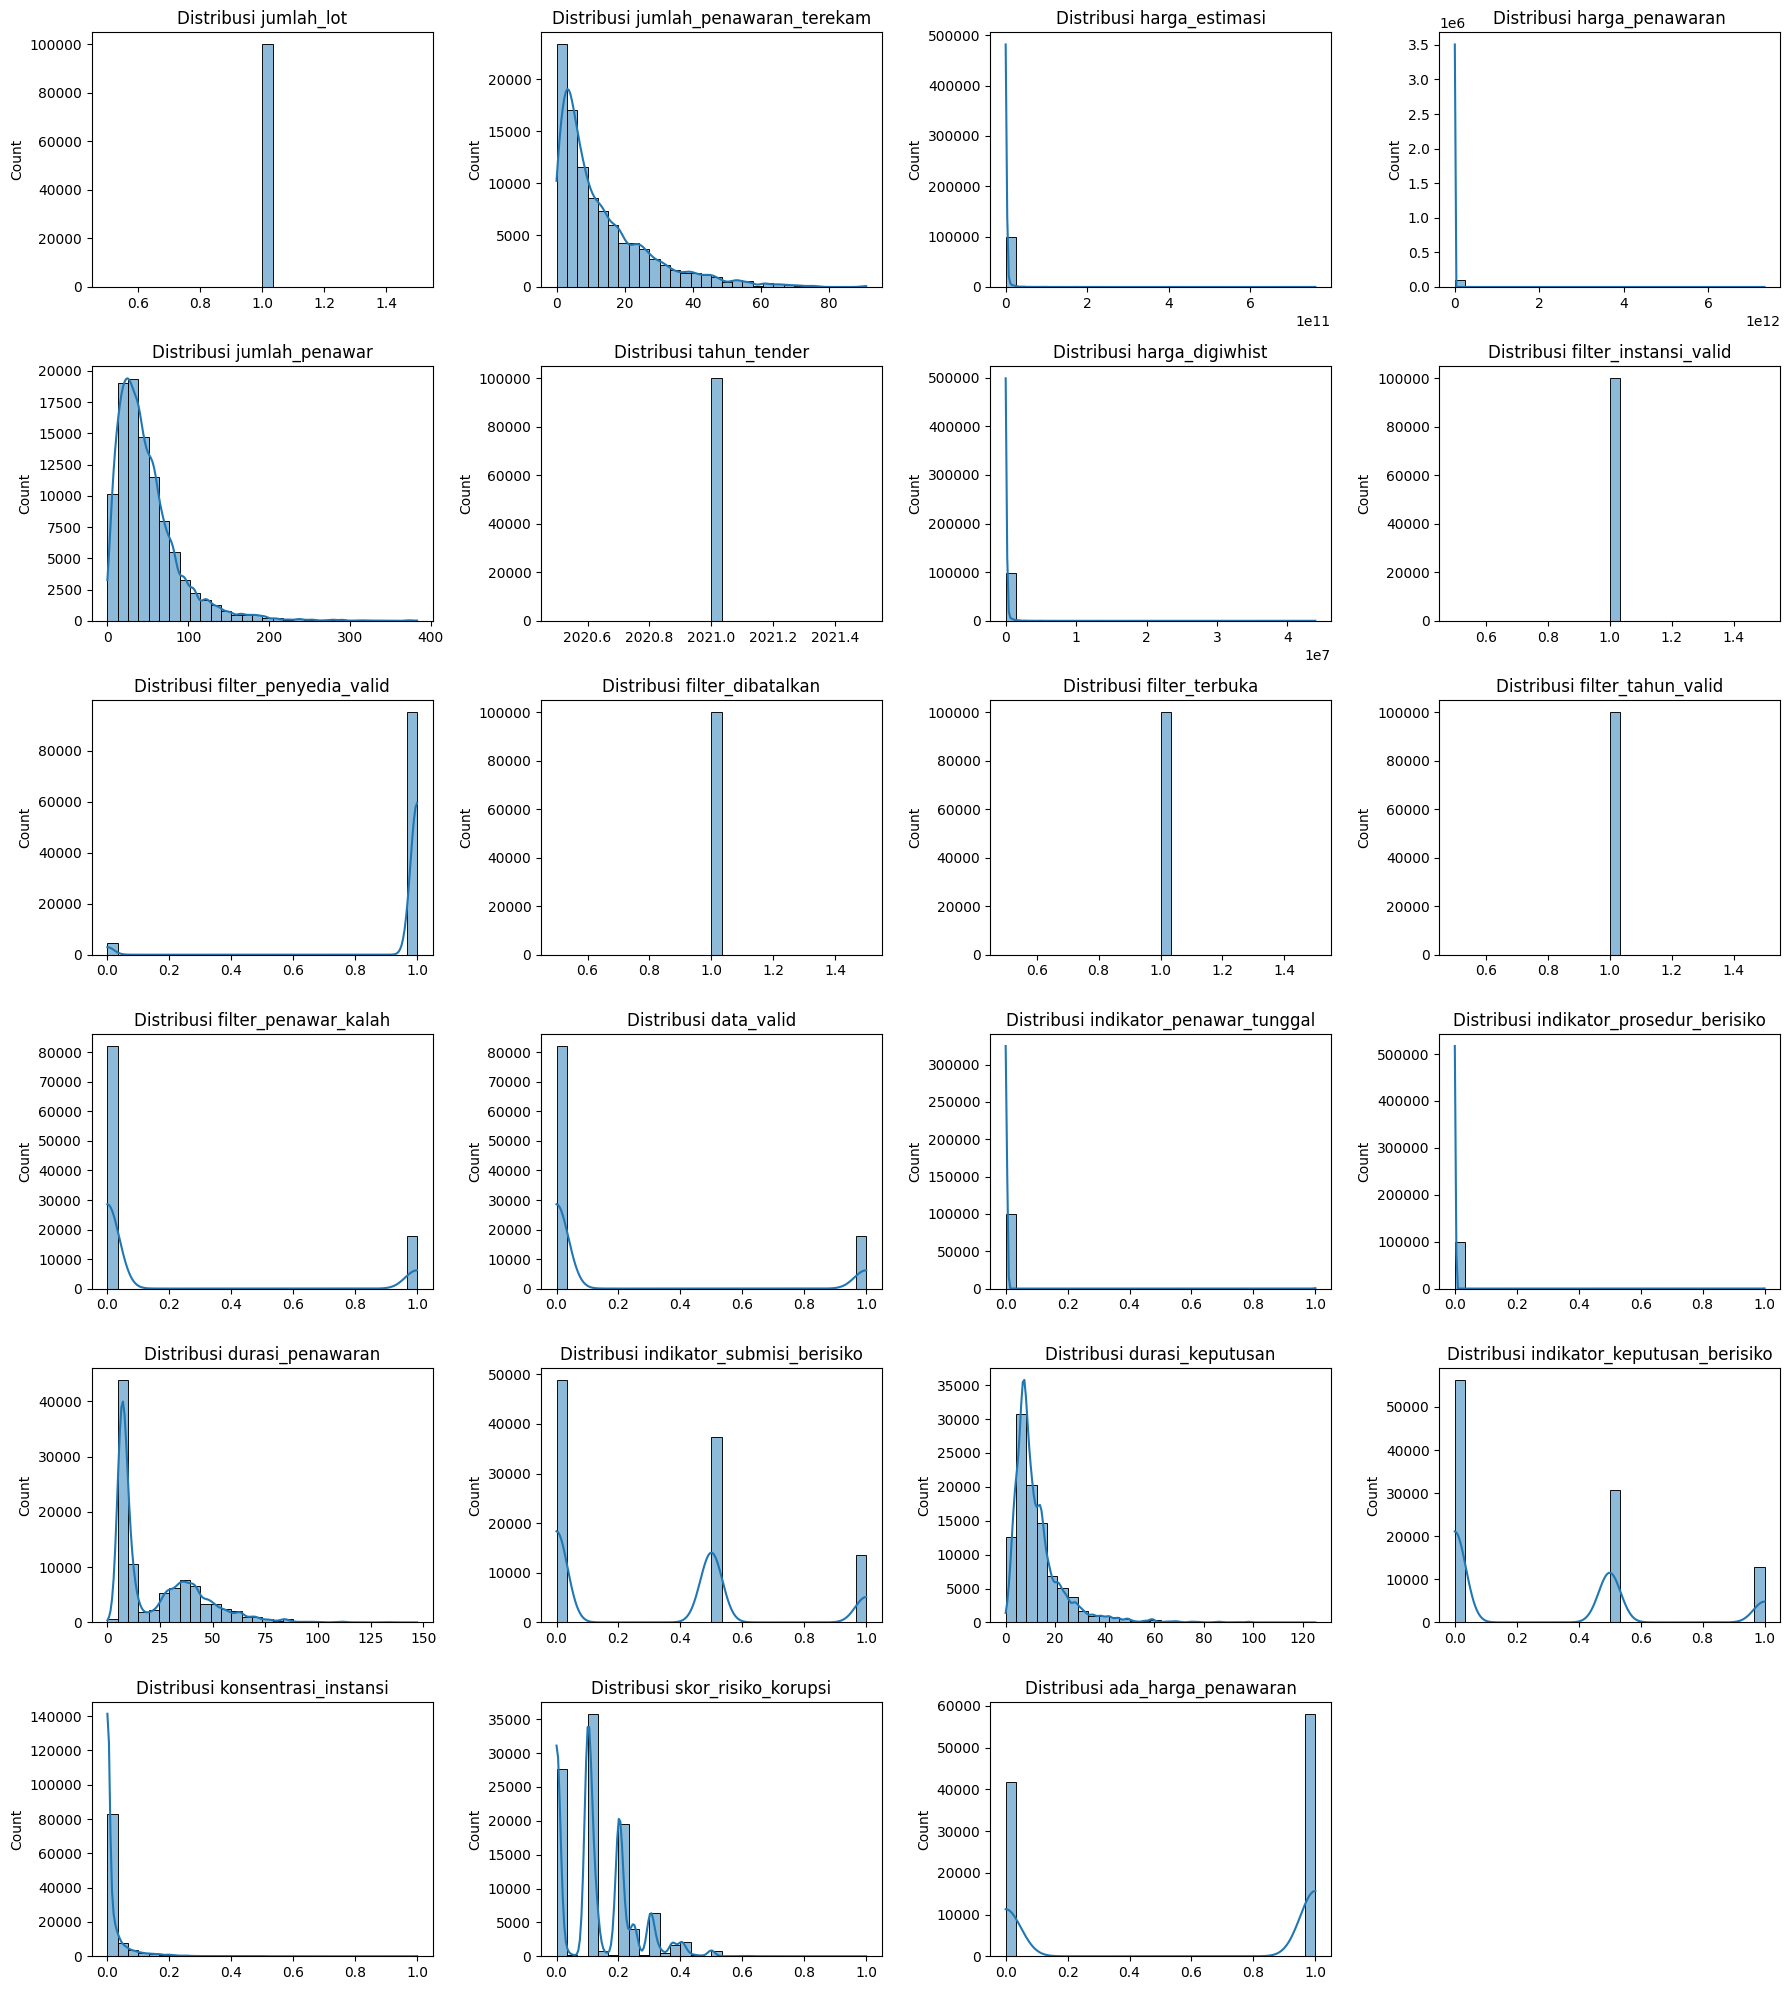

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih fitur numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Drop kolom target agar tidak diplot dulu
numeric_cols.remove('label')

# Plot distribusi
plt.figure(figsize=(18, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

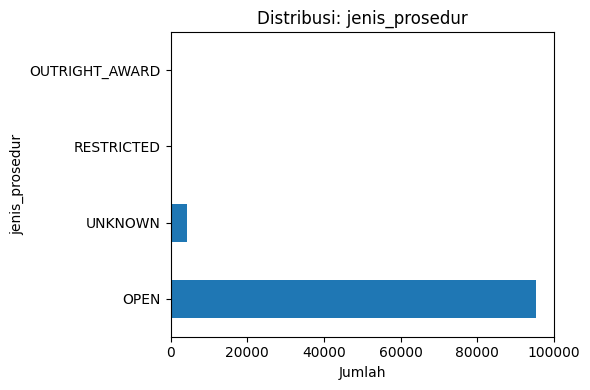

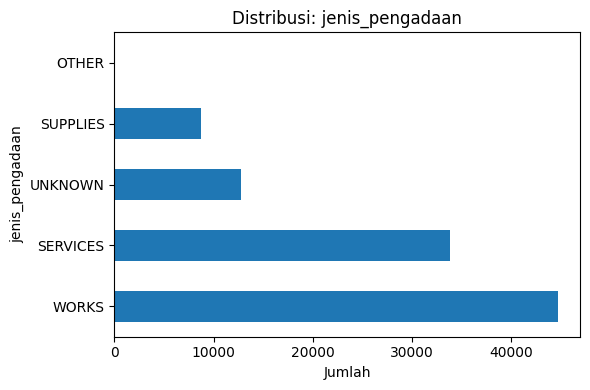

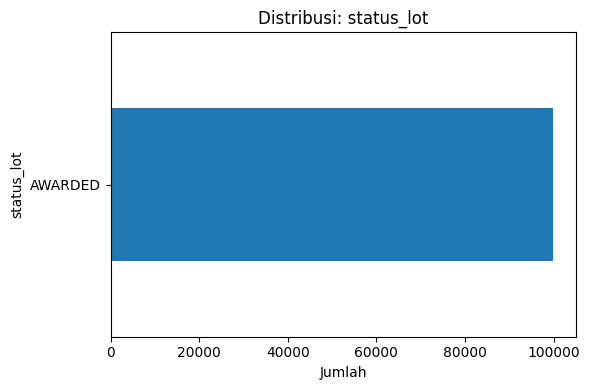

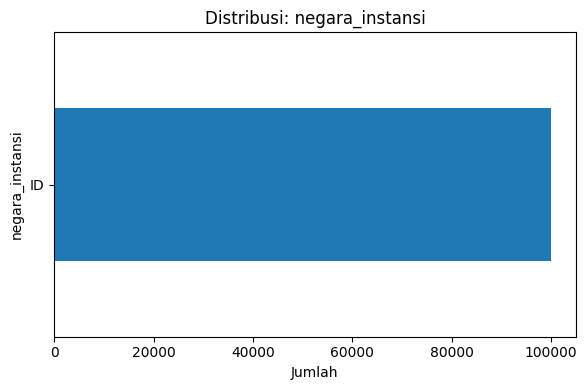

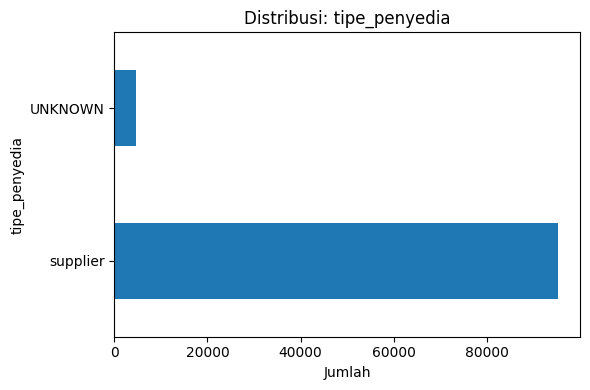

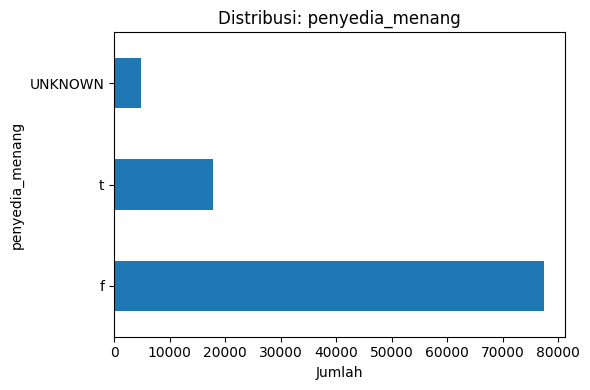

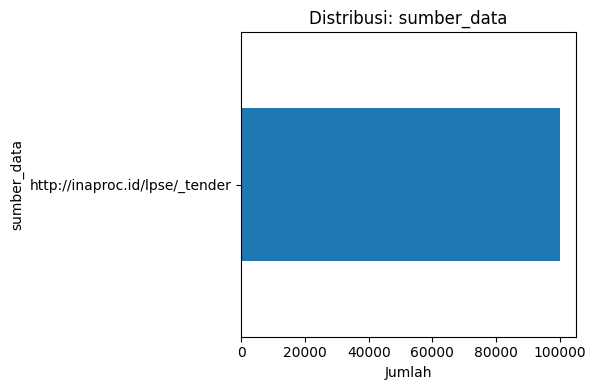

In [ ]:
# Pilih kolom bertipe kategorikal
cat_cols = df.select_dtypes(include=['object']).columns

# Kolom-kolom yang ingin dikecualikan dari visualisasi
excluded_cols = ['id_tender', 'id_lot', 'id_penyedia', 'id_penawaran',
    'judul_tender', 'nama_penyedia', 'nama_instansi']

# Loop hanya untuk kolom kategorikal yang bukan ID
for col in cat_cols:
    if col not in excluded_cols:
        plt.figure(figsize=(6, 4))
        df[col].value_counts().plot(kind='barh')
        plt.title(f'Distribusi: {col}')
        plt.xlabel('Jumlah')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = [
    'jenis_prosedur',
    'jenis_pengadaan',
    'status_lot',
    'tipe_penyedia',
    'penyedia_menang',
    'sumber_data'
]

df_encoded = df.copy()
le = LabelEncoder()

for col in cols_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])


# Menghitung jumlah data berdasarkan label

In [ ]:
label_counts = data['label'].value_counts()

print("Jumlah data per label:")
print(label_counts)

Jumlah data per label:
label
0    88397
1    11551
Name: count, dtype: int64


# Pisahkan Nilai X dan Y

In [ ]:
X = data.drop(columns=['skor_risiko_korupsi', 'indikator_penawar_tunggal', "indikator_prosedur_berisiko", "indikator_submisi_berisiko", "indikator_keputusan_berisiko", "konsentrasi_instansi", 'label'])
y = data['label']

print("Ukuran X (fitur):", X.shape)
print("Ukuran y (label):", y.shape)

Ukuran X (fitur): (99948, 33)
Ukuran y (label): (99948,)


In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99943    1
99944    0
99945    0
99946    0
99947    1
Name: label, Length: 99948, dtype: int64


# Train Test

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji   :", X_test.shape[0])

Jumlah data latih: 79958
Jumlah data uji   : 19990


# Melakukan SMOTE

In [ ]:
# 1. Cek kolom non-numerik
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Kolom non-numerik:", list(non_numeric_cols))

# 2. Drop kolom non-numerik dari data training sebelum SMOTE
X_train_num = X_train.drop(columns=non_numeric_cols)

# 3. Terapkan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_num, y_train)

# 4. Cek hasilnya
from collections import Counter
print("Distribusi label setelah SMOTE:", Counter(y_train_resampled))


Kolom non-numerik: ['id_tender', 'judul_tender', 'jenis_prosedur', 'jenis_pengadaan', 'tanggal_kontrak', 'tanggal_keputusan_pemenang', 'status_lot', 'nama_instansi', 'negara_instansi', 'id_penyedia', 'nama_penyedia', 'tipe_penyedia', 'penyedia_menang', 'sumber_data', 'id_lot', 'id_penawaran']
Distribusi label setelah SMOTE: Counter({0: 70717, 1: 70717})


In [ ]:
X_train_num

,jumlah_lot,jumlah_penawaran_terekam,harga_estimasi,harga_penawaran,jumlah_penawar,tahun_tender,harga_digiwhist,filter_instansi_valid,filter_penyedia_valid,filter_dibatalkan,filter_terbuka,filter_tahun_valid,filter_penawar_kalah,data_valid,durasi_penawaran,durasi_keputusan,ada_harga_penawaran
68894,1.0,6.0,3.399000e+08,3.349500e+08,84.0,2021.0,19017.0,1,1,1,1,1,0,0,12.0,15.0,1.0
42164,1.0,6.0,7.066925e+09,6.038653e+09,122.0,2021.0,331563.0,1,1,1,1,1,0,0,8.0,13.0,1.0
78270,1.0,6.0,8.660145e+08,6.952771e+08,47.0,2021.0,41419.0,1,1,1,1,1,0,0,5.0,18.0,1.0
24381,1.0,6.0,4.102889e+08,3.652716e+08,58.0,2021.0,20108.0,1,1,1,1,1,0,0,9.0,25.0,1.0
76601,1.0,27.0,2.551190e+08,1.987084e+08,114.0,2021.0,12309.0,1,1,1,1,1,0,0,10.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27555,1.0,0.0,7.452801e+09,0.000000e+00,101.0,2021.0,433849.0,1,0,1,1,1,0,0,20.0,26.0,0.0
32568,1.0,46.0,4.810355e+08,0.000000e+00,70.0,2021.0,27513.0,1,1,1,1,1,0,0,37.0,13.0,0.0
18494,1.0,3.0,3.839417e+08,3.071534e+08,44.0,2021.0,17344.0,1,1,1,1,1,0,0,11.0,17.0,1.0
57325,1.0,9.0,1.226450e+10,1.064461e+10,104.0,2021.0,637427.0,1,1,1,1,1,0,0,5.0,37.0,1.0


# Random Forest Library

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 1. Inisialisasi dan latih model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Hapus kolom non-numerik dari X_test agar sesuai dengan X_train_resampled
X_test_clean = X_test.drop(columns=non_numeric_cols)

# Coba prediksi ulang
y_pred = rf_model.predict(X_test_clean)


# 3. Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
[[17661    19]
 [   21  2289]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9988    0.9989    0.9989     17680
           1     0.9918    0.9909    0.9913      2310

    accuracy                         0.9980     19990
   macro avg     0.9953    0.9949    0.9951     19990
weighted avg     0.9980    0.9980    0.9980     19990



Feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=200,min_samples_split=2,max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

                     Feature  Importance
15          durasi_keputusan    0.454682
14          durasi_penawaran    0.275030
1   jumlah_penawaran_terekam    0.119859
3            harga_penawaran    0.044724
4             jumlah_penawar    0.032468
16       ada_harga_penawaran    0.023465
2             harga_estimasi    0.017258
6            harga_digiwhist    0.014550
8      filter_penyedia_valid    0.013808
13                data_valid    0.002457
12      filter_penawar_kalah    0.001698
0                 jumlah_lot    0.000000
5               tahun_tender    0.000000
7      filter_instansi_valid    0.000000
11        filter_tahun_valid    0.000000
9          filter_dibatalkan    0.000000
10            filter_terbuka    0.000000


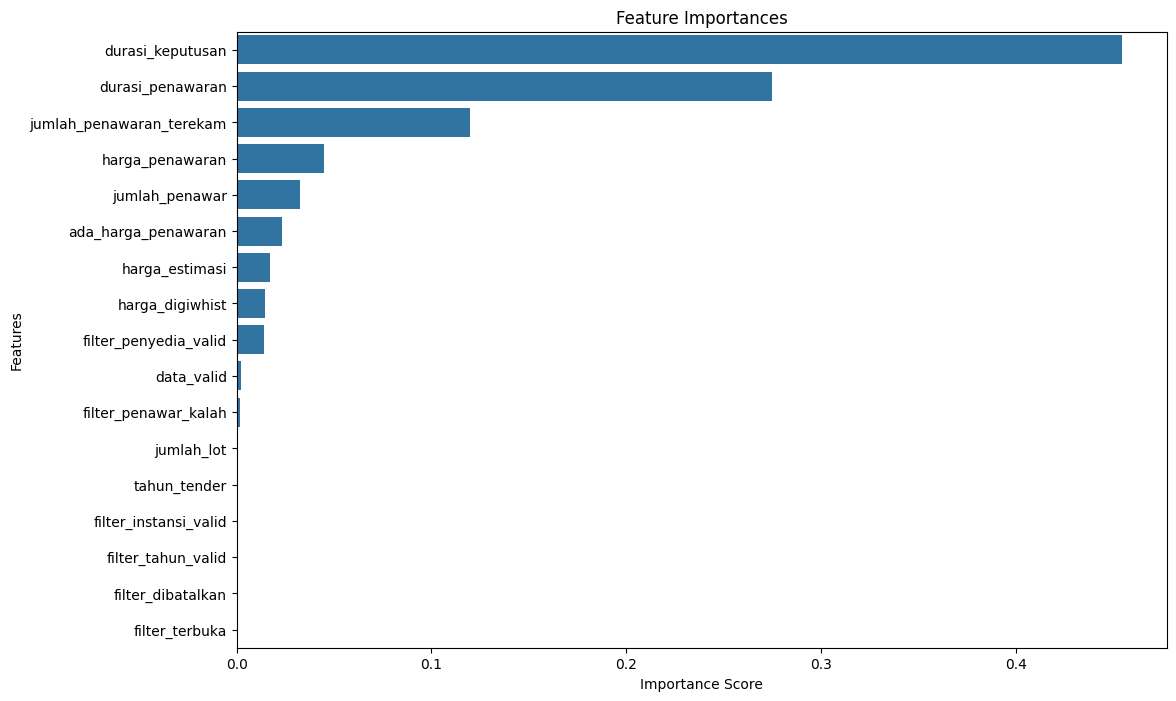

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil feature importances
feature_importances = rf.feature_importances_

# Jika nama fitur tersedia (misalnya X_train adalah DataFrame)
feature_names = X_train_num.columns

# Gabungkan nama fitur dengan nilai pentingnya
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Urutkan berdasarkan kepentingan
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan hasil dalam tabel
print(importance_df)

# Visualisasi menggunakan bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


# SVM Library

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Misalnya sebelum PCA, dan setelah X, y dibentuk
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train_resampled, y_train_resampled)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[12722  1400]
 [  443 13722]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     14122
           1       0.91      0.97      0.94     14165

    accuracy                           0.93     28287
   macro avg       0.94      0.93      0.93     28287
weighted avg       0.94      0.93      0.93     28287

Accuracy Score: 0.9348463958708948
